# Introduction to regression with neural network in TensorFlow
There are many defintions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number.

In [73]:
import tensorflow as tf
print(tf.__version__)

2.19.0


### creating data to view and fit


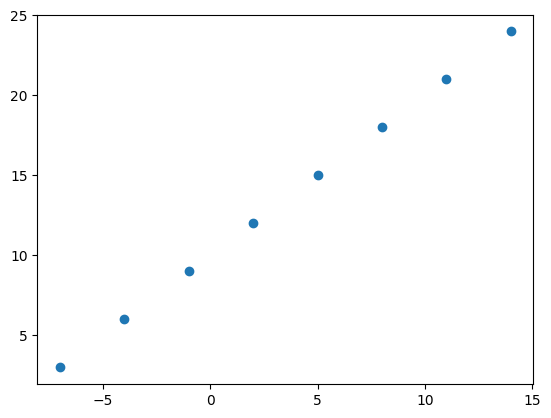

In [74]:
import numpy as np
import matplotlib.pyplot as plt


# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0,11.0, 14.0])
# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0,24.0])
plt.scatter(X,y)

In [75]:
# #create random number
# X = tf.random.uniform([2,3,4,2,23], minval = -100, maxval = 20)
# X =np.array(X)
# y = tf.random.uniform([2,3,4,23,2], minval = 10 , maxval = 200)
# y = np.array(y)
# plt.scatter(X,y)


In [76]:
#  Create a demo tensor for out housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant(939700)
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=939700>)

In [77]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape, print("\n"), X, y

X = tf.constant(X)
y = tf.constant(y)
X, y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## steps in modelling with TensorFlow
1.  **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function ( in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics ( what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).


In [142]:
# set random seed
tf.random.set_seed(42)
# 1. create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])
 # Fit the model
X = tf.constant(np.array(X).reshape(-1,1))
# print(X,"\nVS\n",y)
model.fit(X,y,epochs=100,verbose=0)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

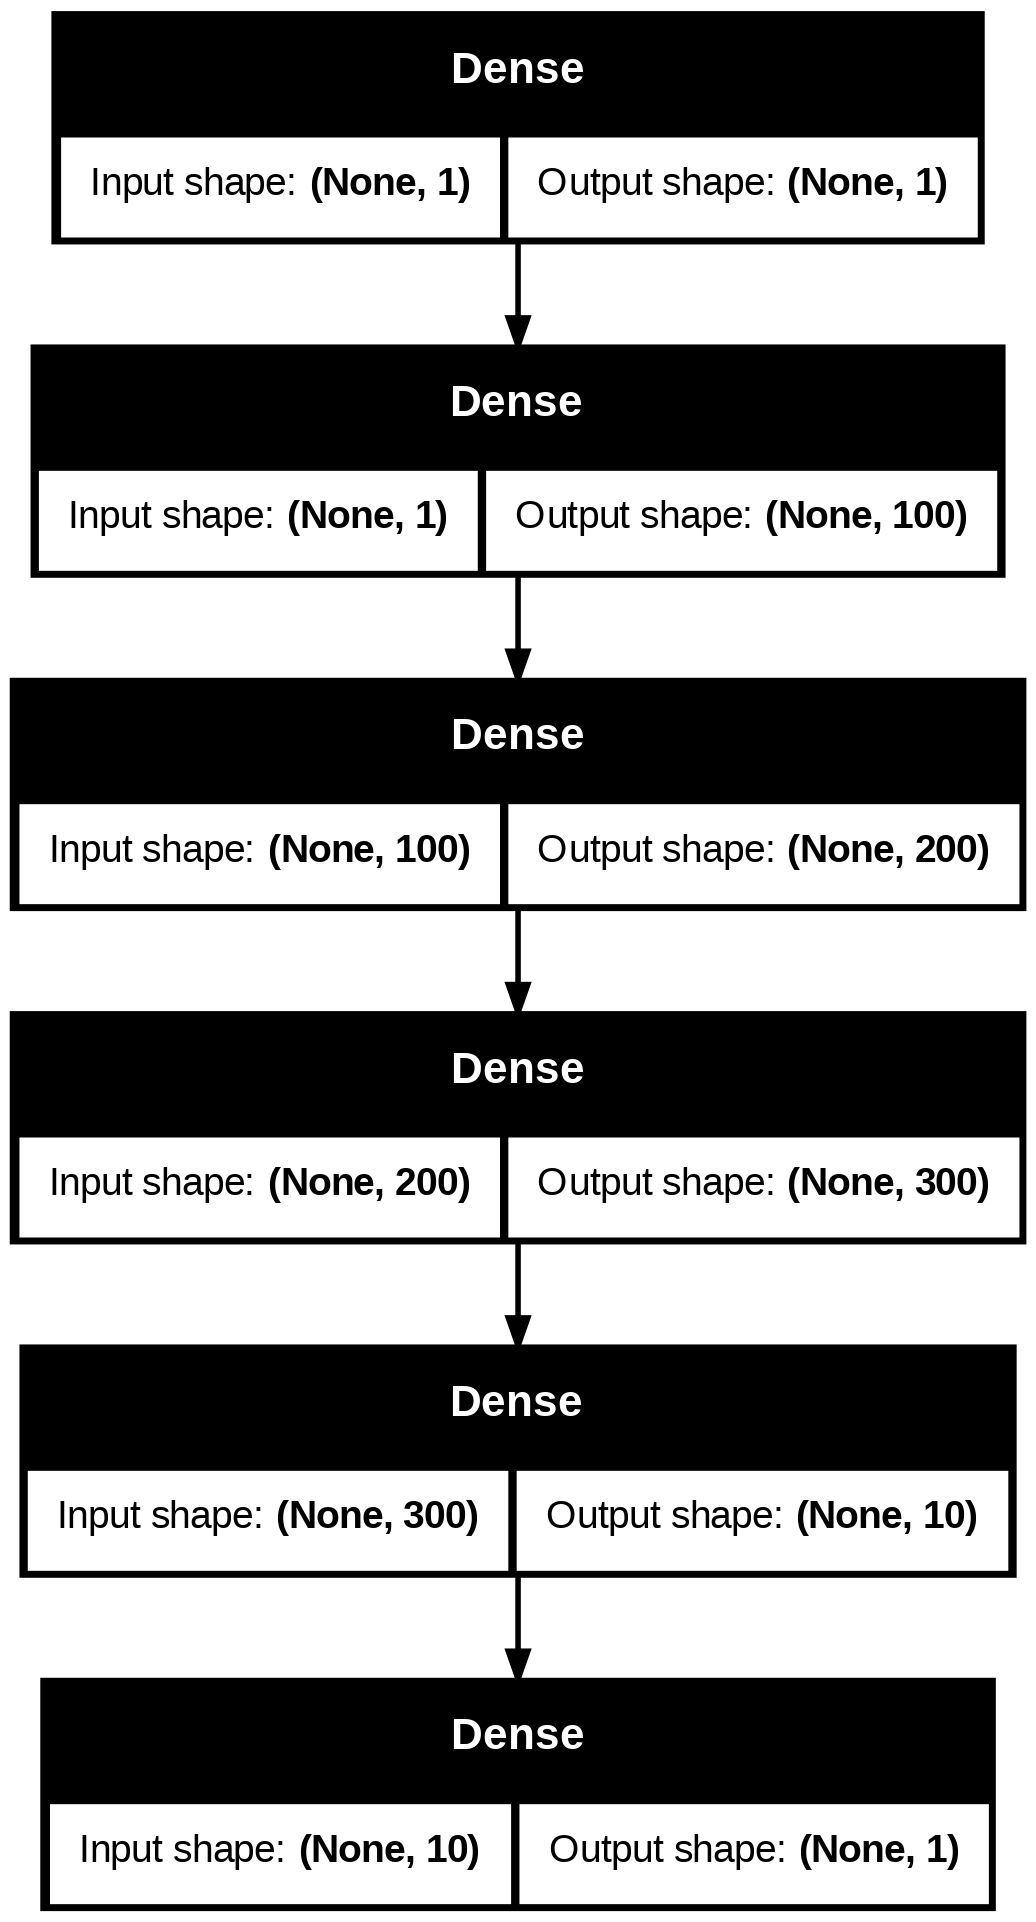

In [79]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [80]:
# print(X,y)
test = tf.constant(10., shape=[1,1])
model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[22.792154]], dtype=float32)

# how we can improve the model
We can improve our model, by altering the steps we took to creat a model.
1. **Creating a model** - here we might add more layers, increases the number of hidden units(all called neurons)
within each of the hidden layes, change the activation function  of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the ***learning rate*** of the optimization function.
3. **Fitting a model** - here we mgiht fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


## Let's rebuild our model

In [81]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)


])
# Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(0.005),
              metrics= ['mae'])
# fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.3626 - mae: 13.3626
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.8222 - mae: 11.8222
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.5937 - mae: 10.5937
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.3119 - mae: 9.3119
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.6887 - mae: 7.6887
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.6260 - mae: 5.6260
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 4.0186 - mae: 4.0186
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 4.9097 - mae: 4.9097
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 5.5267 - mae: 5.5267
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 5.4908 - mae: 5.4908
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.0116 - mae: 5.0116
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 4.2633 - mae: 4.2633
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms

###Literally to improve model performance try to adjust the following stuffs
* `adding layers`
* `increase the number of hidden units`
* `change the activation functions`
* `change the optimization function`
* `change the learning rate`
* `fitting on more data`
* `fitting for longer`

In [82]:
print(X,y)
a = 10
test =tf.constant(a,shape=[1,1])
model.predict(test)

tf.Tensor(
[[-7.]
 [-4.]
 [-1.]
 [ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]], shape=(8, 1), dtype=float64) tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[19.8279]], dtype=float32)

# Evaluating the model

In [83]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

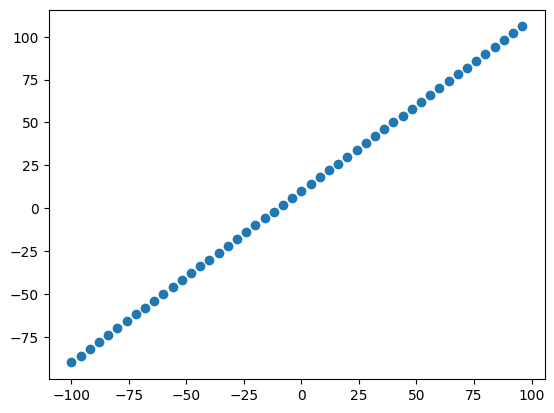

In [84]:
y = X + 10
y
plt.scatter(X,y)

### The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set**   - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.



In [145]:
# check the length of how many samples we have
len(X)
# split the data into train and test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]
len(X_train), len(y_train), len(X_test),len( y_test)



(40, 40, 1298, 1298)

ValueError: x and y must be the same size

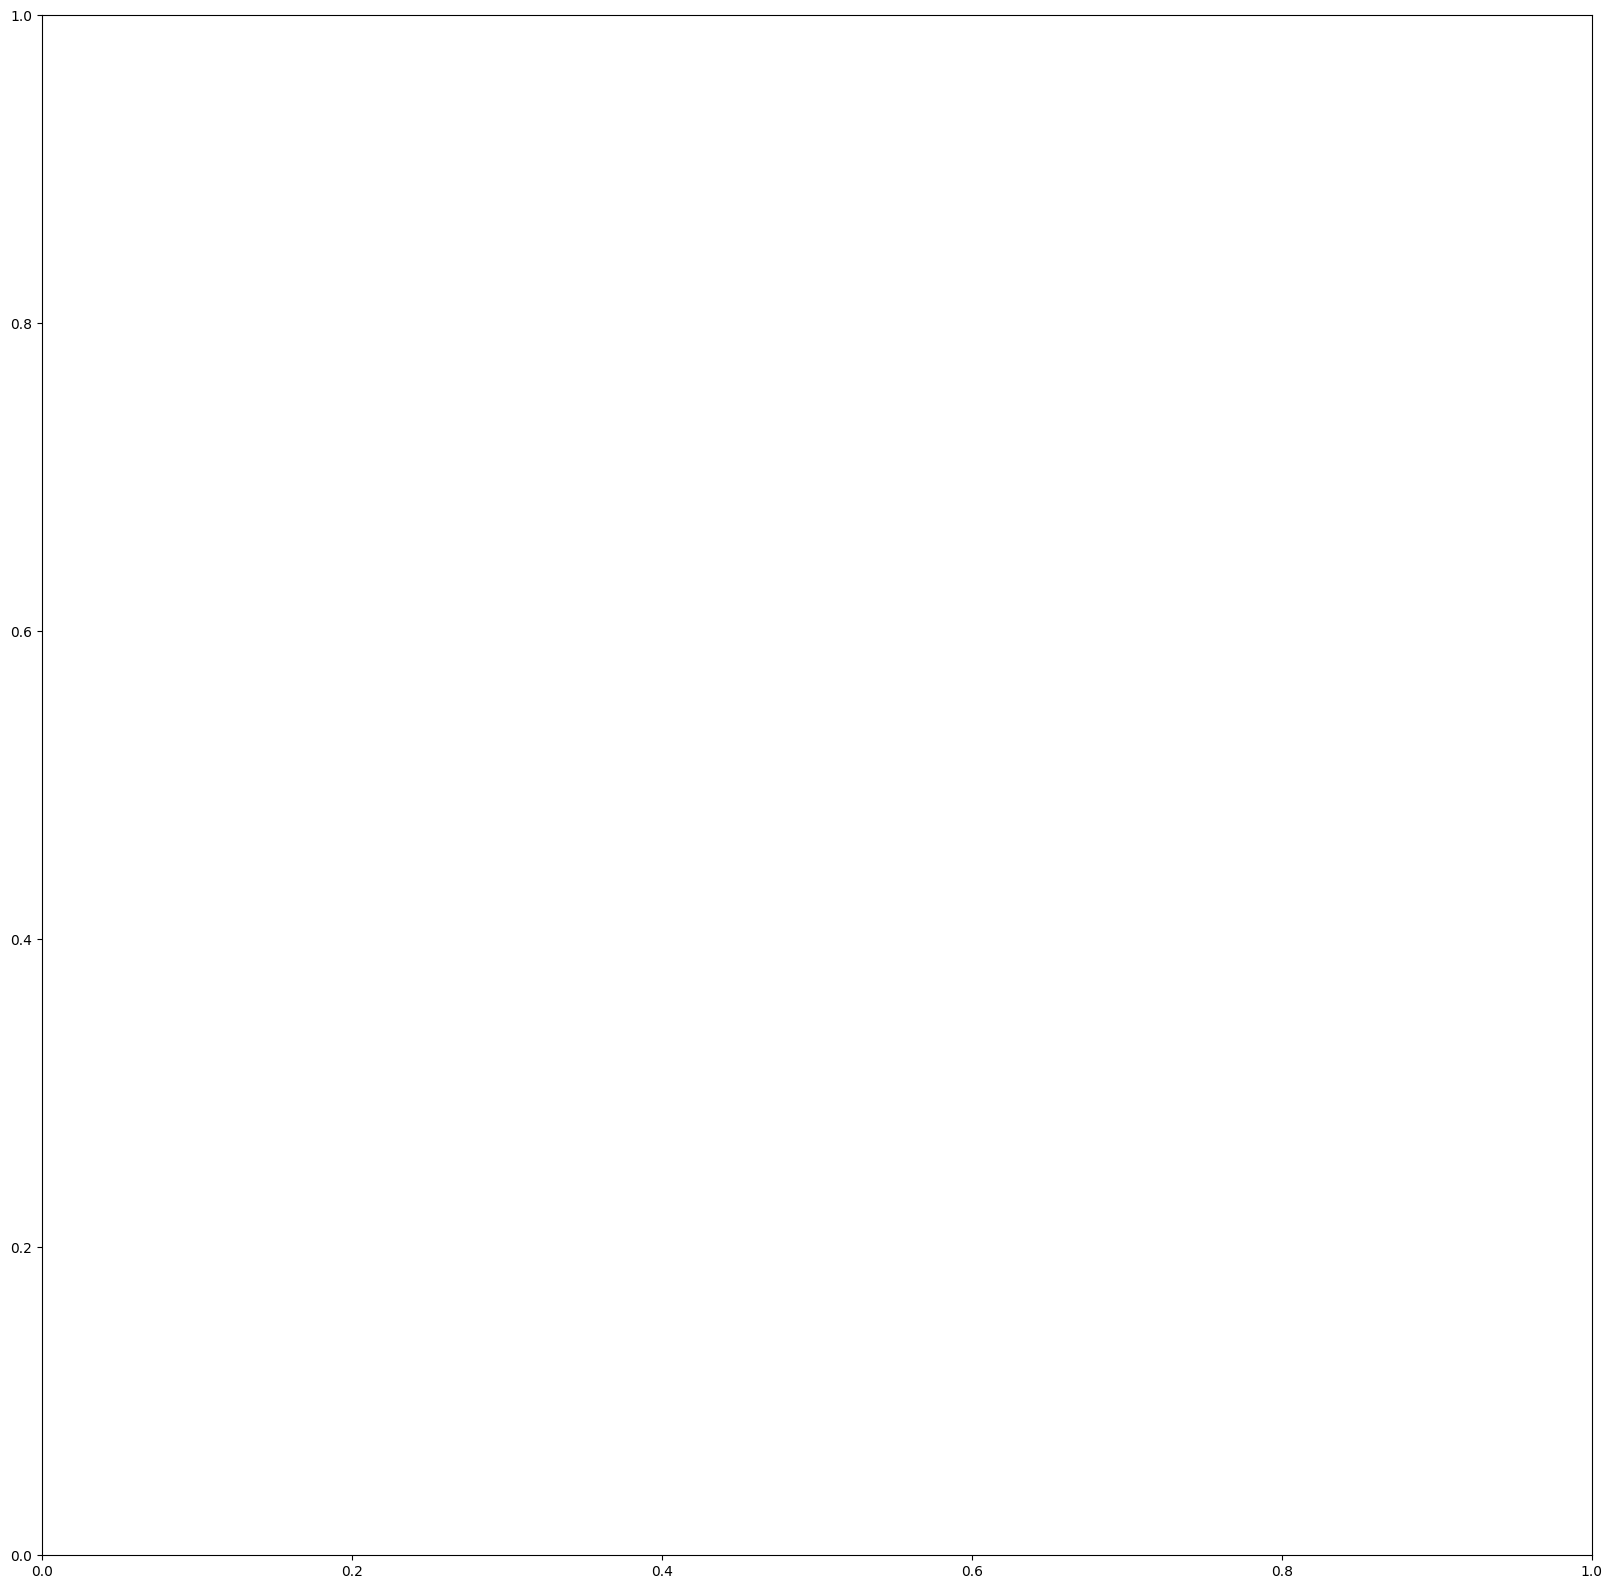

In [146]:
# Visualing the data
plt.figure(figsize=(20,20))
plt.scatter(X_train,y_train, c="b",label="Training datat")
plt.scatter(X_test,y_test,c="g",label = "Testing data")
plt.legend()

In [87]:
from os import name


# Create a model
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1],name="input_layers"),
    tf.keras.layers.Dense(100,name="hidden_layers"),
    tf.keras.layers.Dense(1, name="output_layers")],
    name="model_1")
# compile the model
model.compile(loss = tf.keras.losses.huber,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics =["mae"]
              )
# fit the model
model.fit(X_train, y_train, epochs=100,verbose=0)
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layers (Dense)            │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layers (Dense)           │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layers (Dense)           │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 911 (3.56 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 608 (2.38 KB)

In [88]:
test = tf.constant(120.0, shape=[1,1])
model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[128.06941]], dtype=float32)

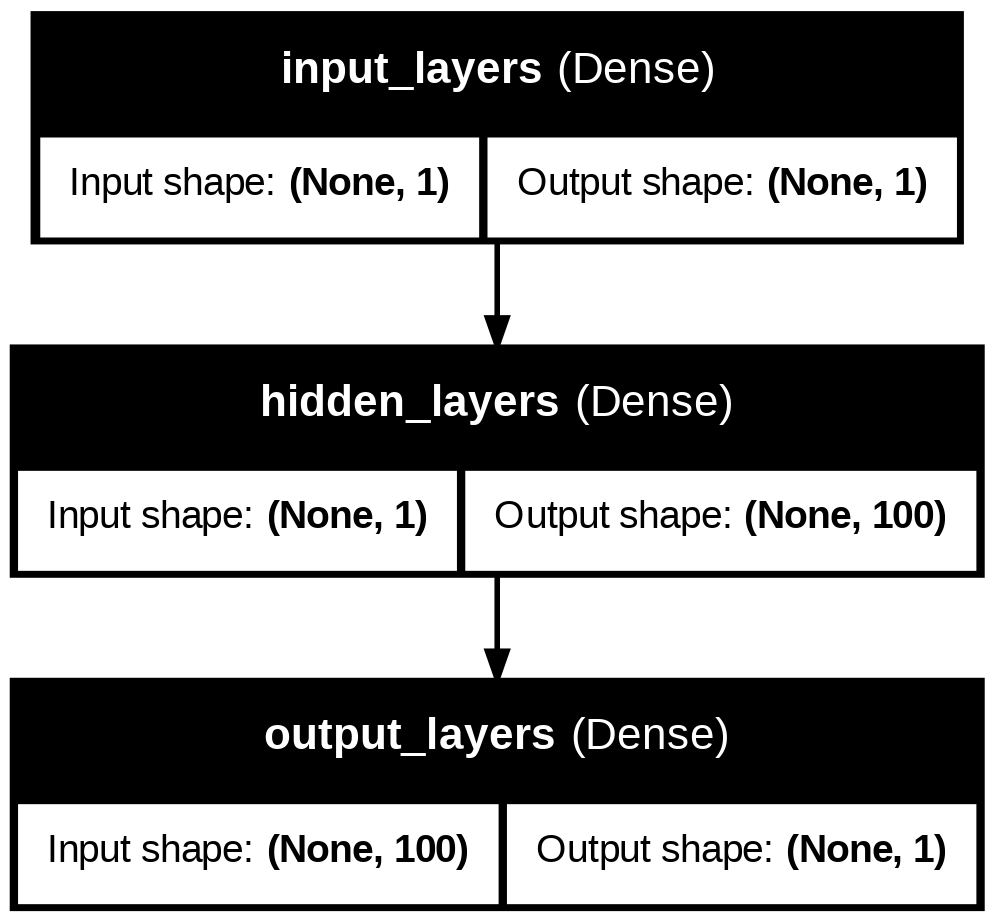

In [89]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True,show_layer_names=True )

In [90]:
y_pred = model.predict(y_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[ 78.8611  ],
       [ 82.79776 ],
       [ 86.73443 ],
       [ 90.6711  ],
       [ 94.60776 ],
       [ 98.54442 ],
       [102.48108 ],
       [106.417755],
       [110.354416],
       [114.291084]], dtype=float32)

In [91]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

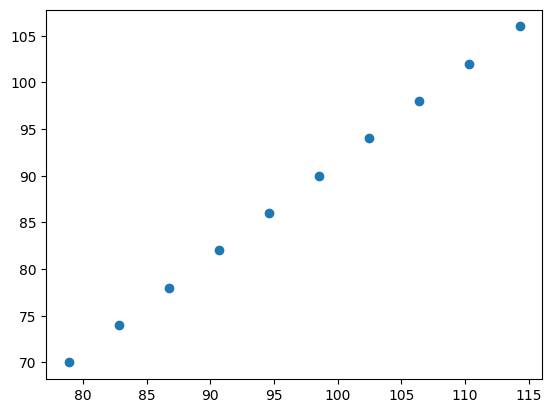

In [92]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)

### Visualizeing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.
Often you'll see this in the form of `y_test` or `ytrue` versus `y_pred` ( ground truth verssus you model)

In [93]:
y_pred = model.predict(X_test)
y_pred,y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


(array([[ 69.019424],
        [ 72.95609 ],
        [ 76.89275 ],
        [ 80.82942 ],
        [ 84.76609 ],
        [ 88.70275 ],
        [ 92.63941 ],
        [ 96.576096],
        [100.51276 ],
        [104.44941 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

ValueError: x and y must be the same size

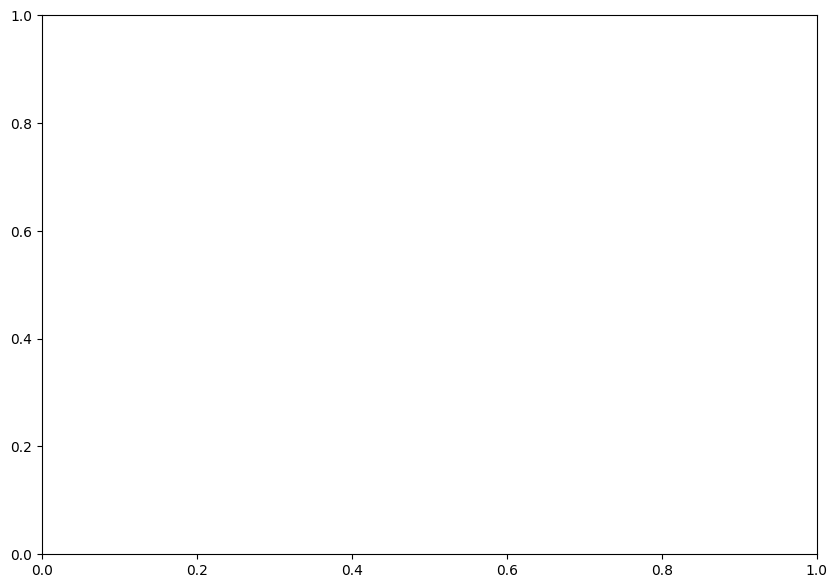

In [147]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="training data")
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend();
plot_predictions()




In [95]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 0.7656 - mae: 1.2656


[0.7655981183052063, 1.2655792236328125]

In [96]:
test = tf.constant(4.0, shape=(1,1))
model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[13.906094]], dtype=float32)

In [97]:
mean_error = tf.keras.losses.MAE(y_test,y_pred).numpy()
sum(mean_error)/10


np.float32(1.2655792)

In [98]:
m = tf.keras.metrics.MeanAbsoluteError()
m.update_state(y_test,y_pred)
m.result(),"mae object itself: ", m


(<tf.Tensor: shape=(), dtype=float32, numpy=1.2655792236328125>,
 'mae object itself: ',
 <MeanAbsoluteError name=mean_absolute_error>)

In [99]:
# Calculate the mean squeare error
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test,y_pred)
mse.result(), mse
# or we can impliment the the following way as well.
tf.keras.losses.MSE(y_true=y_test,y_pred=tf.squeeze(y_pred))


<tf.Tensor: shape=(), dtype=float32, numpy=1.634783387184143>

In [100]:
# Make some function to reuse MAe and MSE
def mae(y_true, y_pred):
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_true,y_pred)
  return mae.result()
def mse(y_true, y_pred):
  mse = tf.keras.metrics.MeanSquaredError()
  mse.update_state(y_true,y_pred)
  return mse.result()
mae(y_test,y_pred),"vs", mse(y_test,y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.2655792236328125>,
 'vs',
 <tf.Tensor: shape=(), dtype=float32, numpy=1.634783387184143>)

## Running experiments to imporove our model
```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```
1. Get more data
2. Make your model larger
3. Train for longer

Let's do 3 modelling experiments:
1. `model_1` - same as the original mdoel, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. `model_4`
5. `model_5`
**Build Model_1**


In [101]:
# SET RANDOM SEED
tf.random.set_seed(42)

# 1.create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)],
    name="model_1")
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
# 3. fit the model
X_train = tf.reshape(X_train,shape=(40,1))
y_train = tf.reshape(y_train,shape=(40,1))
model_1.fit(X_train,y_train,epochs=100,verbose=0)
# let's visualize our training data
'''print(X_train,y_train)
print("\n Dimenssions: ",X_train.ndim,y_train.ndim)
'''




'print(X_train,y_train)\nprint("\n Dimenssions: ",X_train.ndim,y_train.ndim)\n'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


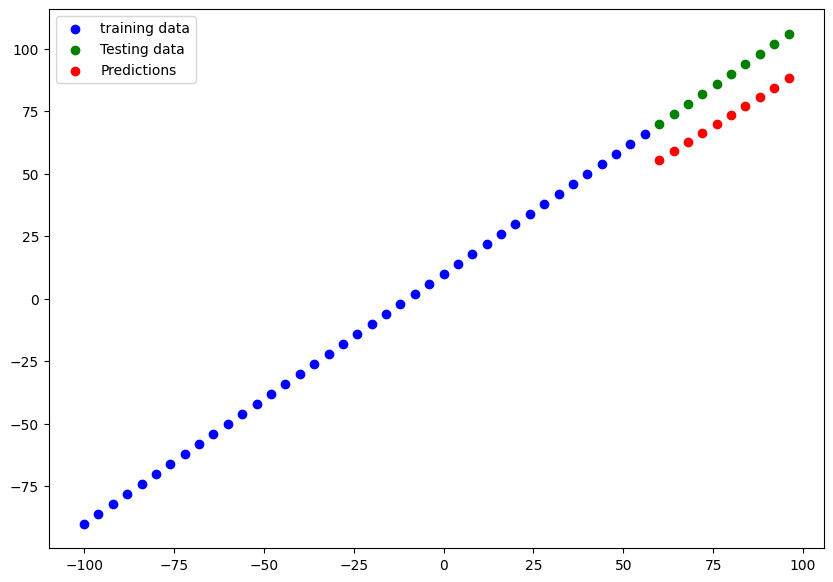

In [102]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [103]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1, mse_1


(<tf.Tensor: shape=(), dtype=float32, numpy=16.13852310180664>,
 <tf.Tensor: shape=(), dtype=float32, numpy=261.6832580566406>)

**Build `model_2`**
* 2 dense layers - trainded for 100 epochs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
tf.Tensor(10, shape=(), dtype=int32) vs tf.Tensor(10, shape=(), dtype=int32) vs tf.Tensor(10, shape=(), dtype=int32)


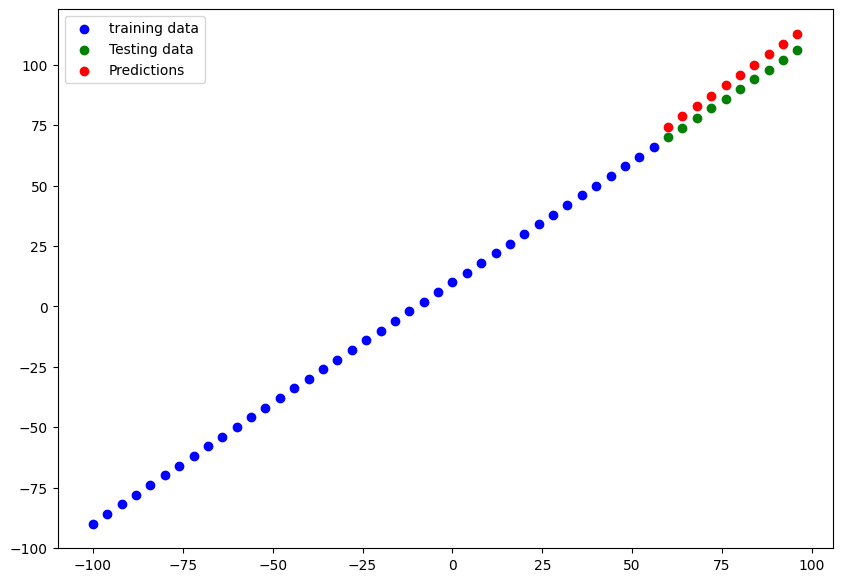

In [104]:
# set random seed
tf.random.set_seed(42)
# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(300),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),

    tf.keras.layers.Dense(1)

    ], name="model_2")
# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
                metrics=["mae"])
# Fit the model

model_2.fit(X_train,y_train,epochs=250,verbose=0)
y_preds_2 = model_2.predict(X_test)
# print(f"training Data: {tf.squeeze(X_train), tf.shape(X_train)} ")
print(tf.size(y_preds_2),"vs",tf.size(X_test),"vs", tf.size(y_test))

plot_predictions(train_data=tf.squeeze(X_train),
                 train_labels=tf.squeeze(y_train),
                 test_data=tf.squeeze(X_test),
                 test_labels=tf.squeeze(y_test),
                 predictions=tf.squeeze(y_preds_2))

In [105]:
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=5.61386775970459>,
 <tf.Tensor: shape=(), dtype=float32, numpy=32.11948013305664>)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


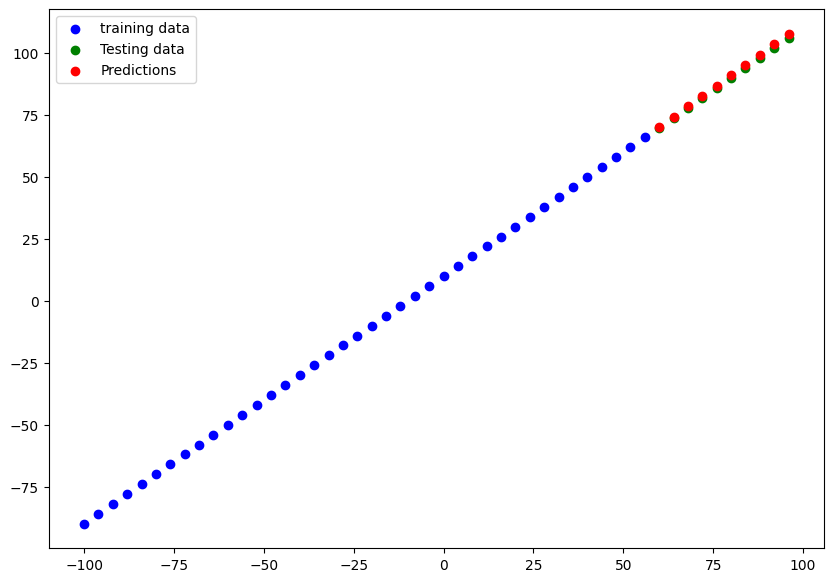

In [106]:
# set ranodm seed
tf.random.set_seed(42)
# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="model_3")
# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
# fit the model
model_3.fit(X_train, y_train, epochs=500,verbose=0)

# test the model
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)


In [107]:
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0070717334747314>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.3165363073349>)

In [108]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]

In [109]:
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,16.138523,261.683258
1,model_2,5.613868,32.119480
2,model_3,1.007072,1.316536


In [110]:
model_1.summary(),model_2.summary(),model_3.summary()


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 483,305 (1.84 MB)

 Trainable params: 161,101 (629.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,204 (1.23 MB)

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

(None, None, None)

## Saving our models
saving our models allows us to use them outside of google colab( or wherever they were traained, web app or mobile app)
There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format


In [111]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format.keras")
# save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")




## Loadding a saved model


In [112]:
saved_model_2_HDF5 = tf.keras.models.load_model("best_model_HDF5_format.h5")
saved_model_2_HDF5.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,103 (629.31 KB)

 Trainable params: 161,101 (629.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [113]:
# Loadding a saved model
loaded_model_2 = tf.keras.models.load_model("best_model_SavedModel_format.keras")
loaded_model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 483,305 (1.84 MB)

 Trainable params: 161,101 (629.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,204 (1.23 MB)

In [114]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 483,305 (1.84 MB)

 Trainable params: 161,101 (629.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,204 (1.23 MB)

In [115]:
# Compare model_2 predictions with savedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_model_2_preds = loaded_model_2.predict(X_test)
model_2_preds == loaded_model_2_preds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model ( or any other file) from google colab
If you want to download your files from Google colab:
1. You can go to the "files" tab and right click on th file you're after and click "download"
2. Use code(see the cell below)
3. Save it to Google drive by connecting Google drive and copying it there (see the 2nd cell code below)


In [116]:
# Download a file from Google colab
from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")


In [117]:
# Save a fiel from google colab to Google Drive ( requires mounting Google Drive)
# !cp "/content/best_model_HDF5_format.h5" "/content/drive/MyDrive/tensorflow_models"


## A larger example


In [118]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [119]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [120]:
insurance["sex"], insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [121]:
# Let's try one-hot ecode our DataFrame so it's all numbers
insurance = pd.get_dummies(insurance,dtype=int)
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [122]:
# Create X & y values (features and labeles)
# Create training and test sets
# Build a neural network (sort of like model_2 above)


y_train = tf.constant(insurance["charges"][:1070])
y_test = tf.constant(insurance["charges"][1070:])
print(f"total no of predicted dataset: {len(y)} \ntotal no of train predicted dataset: {len(y_train)}\ntotal no of predicted test dataset: {len(y_test)} ")
print(y_train,"\nvs\n",y_test)

total no of predicted dataset: 50 
total no of train predicted dataset: 1070
total no of predicted test dataset: 268 
tf.Tensor(
[16884.924    1725.5523   4449.462   ...  5757.41345 14349.8544
 10928.849  ], shape=(1070,), dtype=float64) 
vs
 tf.Tensor(
[39871.7043  13974.45555  1909.52745 12096.6512  13204.28565  4562.8421
  8551.347    2102.2647  34672.1472  15161.5344  11884.04858  4454.40265
  5855.9025   4076.497   15019.76005 19023.26    10796.35025 11353.2276
  9748.9106  10577.087   41676.0811  11286.5387   3591.48    33907.548
 11299.343    4561.1885  44641.1974   1674.6323  23045.56616  3227.1211
 16776.30405 11253.421    3471.4096  11363.2832  20420.60465 10338.9316
  8988.15875 10493.9458   2904.088    8605.3615  11512.405   41949.2441
 24180.9335   5312.16985  2396.0959  10807.4863   9222.4026  36124.5737
 38282.7495   5693.4305  34166.273    8347.1643  46661.4424  18903.49141
 40904.1995  14254.6082  10214.636    5836.5204  14358.36437  1728.897
  8582.3023   3693.428   2

In [123]:
# Create X_train, X_test datasets

X = insurance.drop(columns=["charges"])
print(X)
X_train = tf.constant(X[:1070])
X_test = tf.constant(X[1070:])
# print(f"total no of X train: {len(X_train)}\ntotal no of X test: {len(X_test)}")
# print("\n\n\n\n")
# print(X_train)
# print("\n\n\n\n")
# print(X_test)
len(X_train[0])


      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900         0           1         0          0           1   
1      18  33.770         1           0         1          1           0   
2      28  33.000         3           0         1          1           0   
3      33  22.705         0           0         1          1           0   
4      32  28.880         0           0         1          1           0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3           0         1          1           0   
1334   18  31.920         0           1         0          1           0   
1335   18  36.850         0           1         0          1           0   
1336   21  25.800         0           1         0          1           0   
1337   61  29.070         0           1         0          0           1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0       

11

In [124]:
# Build neural network to train insurance dataset in order to predict future insurance of any guy
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(11, activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')


  ],"insurance_model")


# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.006),
                        metrics=["mae"])
# Fit the model

insurance_model.fit(X_train,y_train,epochs=100, verbose=0)



In [125]:
# retrain the model with shuffled dataset
print(insurance)


      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [126]:
# Create X & y values (features and labels)
X = insurance.drop("charges", axis=1)
y = insurance["charges"]
# view X
X.head()
# view y
y.head()

# Create training and test datasets
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_pred = train_test_split(X,y, test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test),len(y), len(y_train),len(y_test)
X_train


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [127]:
# build a neural network (sort of like model_2 above)
tf.random.set_seed(42)
# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae']
                        )
# 3. Fit the model
insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10129.0459 - mae: 10129.0459   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7623.5537 - mae: 7623.5537 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8022.9888 - mae: 8022.9888 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7299.7188 - mae: 7299.7188
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7318.5186 - mae: 7318.5186
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7559.3096 - mae: 7559.3096
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7441.5181 - mae: 7441.5181
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7629.6191 - mae: 7629.6191
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7607.8311 - mae: 7607.8311
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7475.7700 - mae: 7475.7700
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7628.3779 - mae: 7628.3779
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

Right now ti looks like our model isn't performing too well... Let's try and improve it!

In [128]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10665.5166 - mae: 10665.5166  


[10485.1103515625, 10485.1103515625]

In [129]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13256.8203 - mae: 13256.8203
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13088.6924 - mae: 13088.6924
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12749.3838 - mae: 12749.3838
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12081.0918 - mae: 12081.0918
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10948.7637 - mae: 10948.7637
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9483.7812 - mae: 9483.7812
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8124.9951 - mae: 8124.9951
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7456.7476 - mae: 7456.7476
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7359.7720 - mae: 7359.7720
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7335.5894 - mae: 7335.5894
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7314.0962 - mae: 7314.0962
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [130]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9385.5957 - mae: 9385.5957  


[9328.6904296875, 9328.6904296875]

In [131]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10665.5166 - mae: 10665.5166 


[10485.1103515625, 10485.1103515625]

In [132]:
# Set random seed
tf.random.set_seed(42)
# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])
# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13268.1533 - mae: 13268.1533
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13148.1787 - mae: 13148.1787
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12897.3057 - mae: 12897.3057
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12377.8008 - mae: 12377.8008
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11438.3652 - mae: 11438.3652
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10080.8389 - mae: 10080.8389
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8638.4746 - mae: 8638.4746
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7666.6284 - mae: 7666.6284
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7437.3403 - mae: 7437.3403
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7401.2817 - mae: 7401.2817
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7380.3813 - mae: 7380.3813
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [133]:
# Evaluate our thrid model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11817.4219 - mae: 11817.4219  


[11515.3818359375, 11515.3818359375]

In [134]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9385.5957 - mae: 9385.5957 


[9328.6904296875, 9328.6904296875]

Text(0.5, 0, 'epochs')

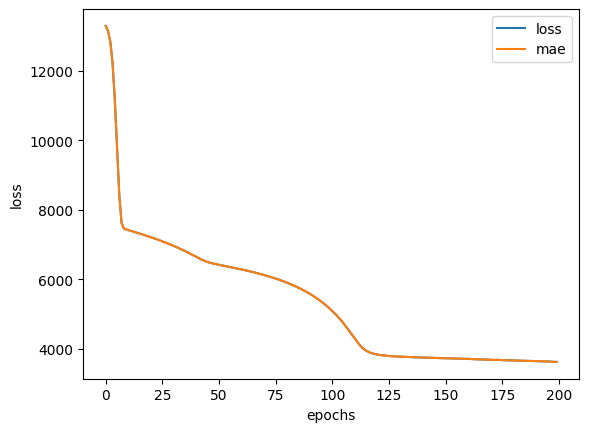

In [135]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> **Question:** How long should you train for?
It depends Really... it depends on the problem you're working on. many people have asked this question before... so Tensorflow has a solution! It's called [`EarlyStopping`](google.com) callback

## Preprocessing data (normalization and standardization)
In terms of scaling values, neural networks tend to prefer normalization.
if you're not sure on which to use, you could try both and see which performse better.

In [136]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Tp preprocess data we will borrow some functions from skitlearn

In [137]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
# Create X and y values
X = insurance.drop("charges",axis=1)
y = insurance["charges"]
#build our train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)
# Transform training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
# print("\n\n\n X train: \n", X_train_normal)
# print("\n\n\n X test: \n", X_test_normal)
# tf.shape(X_train_normal), len(X_train_normal), len(X_train_normal[0])

In [138]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [139]:
X_train_normal[100]

array([0.67391304, 0.17890772, 0.2       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

### Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [140]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Crate the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. Fit the model

history = insurance_model_4.fit(X_train_normal,y_train, epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13297.4043 - mae: 13297.4043
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13289.8916 - mae: 13289.8916
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13270.7734 - mae: 13270.7734
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13228.6143 - mae: 13228.6143
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13152.1631 - mae: 13152.1631
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13030.4492 - mae: 13030.4492
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12852.7861 - mae: 12852.7861
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12609.2119 - mae: 12609.2119
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12290.1357 - mae: 12290.1357
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11889.7773 - mae: 11889.7773
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11416.7764 - mae: 11416.7764
Epoch 12/100
34/34 ━━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3516.5771 - mae: 3516.5771  


Text(0.5, 0, 'epochs')

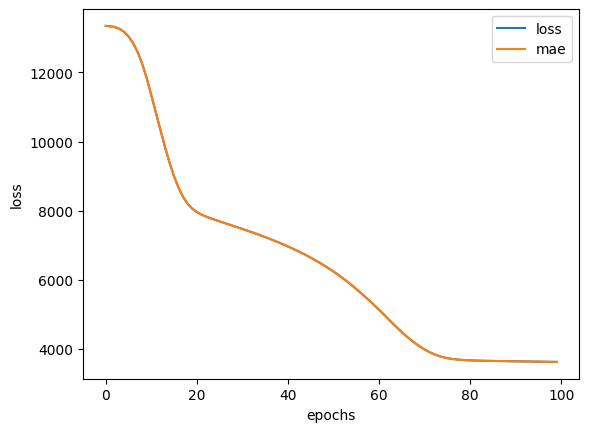

In [141]:
insurance_model_4.evaluate(X_test_normal,y_test)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")